In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import Dense, Activation, Dropout
import time #helper libraries


In [21]:
input_file="DIS.csv"


In [22]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


In [40]:
# fix random seed for reproducibility
np.random.seed(5)

In [41]:
df = read_csv(input_file, header=None, index_col=None, delimiter=',')

In [42]:
all_y = df[5].values
dataset=all_y.reshape(-1, 1)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets, 50% test data, 50% training data
train_size = int(len(dataset) * 0.5)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


In [43]:
look_back = 240
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [44]:
model = Sequential()
model.add(LSTM(25, input_shape=(1, look_back)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=240, verbose=1)



Epoch 1/1000


C:\Users\richa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0087
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028 
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017 
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.1623e-04 
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5526e-04 
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.7674e-04 
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8755e-04 
Epoch 9/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.5076e-04 
Epoch 10/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.8479e-04 
Epoch 11/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2389e-04 
Epoch 12/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8144e-04 
Epoch 13/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6602e-04 
Epoch 14/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4802e-04 
Epoch 15/1000
10/

In [46]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step


In [47]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [48]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.48 RMSE
Test Score: 16.91 RMSE


In [49]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


In [50]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

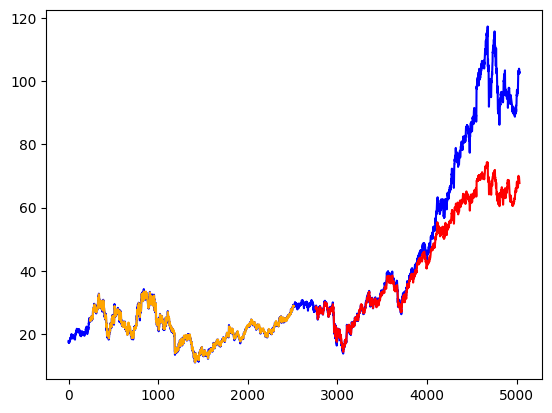

In [52]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label='Actual Data', color='blue')
plt.plot(trainPredictPlot, label='Train Predictions', color='orange')
plt.plot(testPredictPlot, label='Test Predictions', color='red')

In [53]:
print('testPredictions:')
print(testPredict)

testPredictions:
[[28.1554  ]
 [28.479404]
 [28.649359]
 ...
 [68.57704 ]
 [68.3119  ]
 [67.76444 ]]


In [37]:
next_prediction = model.predict(testX[-1].reshape(1, 1, look_back))
next_prediction = scaler.inverse_transform(next_prediction)
print(f"Predicted next close price: {next_prediction[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted next close price: 68.4658203125


In [39]:
# export prediction and actual prices
df = pd.DataFrame(data={"prediction": np.around(list(testPredict.reshape(-1)), decimals=2), "test_price": np.around(list(scaler.inverse_transform(dataset[test_size+look_back:]).reshape(-1)), decimals=2)})
df.to_csv("lstm_result.csv", sep=';', index=None)